# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal?
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('data/human_body_temperature.csv')

In [43]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


1: Is the distribution of body temperatures normal?

In [44]:
temp = df.temperature.value_counts().sort_index()
temp

96.3      1
96.4      1
96.7      2
96.8      1
96.9      1
97.0      1
97.1      3
97.2      3
97.3      1
97.4      5
97.5      2
97.6      4
97.7      3
97.8      7
97.9      5
98.0     11
98.1      3
98.2     10
98.3      5
98.4      9
98.5      3
98.6     10
98.7      8
98.8     10
98.9      2
99.0      5
99.1      3
99.2      3
99.3      2
99.4      2
99.5      1
99.9      1
100.0     1
100.8     1
Name: temperature, dtype: int64

In [45]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        array

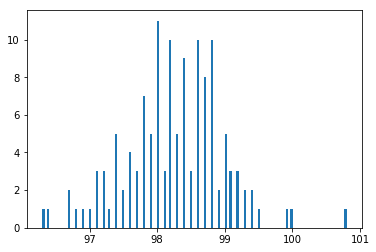

In [57]:
plt.hist(df.temperature,len(df))
plt.show()

Answer: Inconclusive.

2: Is the sample size large? Are the observations independent?

In [47]:
len(df)

130

Answer: I suppose the sample size is large enough to preform tests. However, I cannot explicitly answer, "Yes," or, "No," to a subjective concept such as large. 

As to the independence of the observations, I suppose it's reasonable to conclude they are independent, but without further knowledge of the experiment, I cannot come to any definite conclusion.

3: Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  *t*  or  *z*  statistic?
* Now try using the other test. How is the result be different? Why?

Would you use a one-sample or two-sample test? Why?

Answer: a one-sample test is sufficient as there is only one sample mean versus a proposed population mean or there is only one difference versus a null hypothesis of no difference between sample mean and population mean.

In [48]:
sample_mean = df.temperature.mean()

In [49]:
sample_std = df.temperature.std()

In [50]:
sample_mean, sample_std

(98.24923076923078, 0.7331831580389454)

In this situation, is it appropriate to use the t or z statistic?

Answer: In this situation, I chose to use a t-statistic as the population standard deviation is unknown and it is difficult to conclude by the sample that the population distribution is normal.

In [58]:
null_hyp = 98.6
T = (sample_mean - null_hyp)/(sample_std/np.sqrt(len(df)))
T

-5.4548232923640789

https://stackoverflow.com/questions/17559897/python-p-value-from-t-statistic

In [52]:
pval = stats.t.sf(np.abs(T), len(df) - 1) * 2
pval

2.4106320415609943e-07

In [53]:
print('t-statistic = %6.3f p-value = %6.4f' % (T, pval))

t-statistic = -5.455 p-value = 0.0000


In [54]:
help(stats.t.sf)

Help on method sf in module scipy.stats._distn_infrastructure:

sf(x, *args, **kwds) method of scipy.stats._continuous_distns.t_gen instance
    Survival function (1 - `cdf`) at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    sf : array_like
        Survival function evaluated at x



https://stackoverflow.com/questions/3496656/convert-z-score-z-value-standard-score-to-p-value-for-normal-distribution-in

In [55]:
Z = T
pval = stats.norm.sf(np.abs(Z)) * 2
pval

4.9021570141133797e-08

In [56]:
print('z-statistic = %6.3f p-value = %6.4f' % (Z, pval))

z-statistic = -5.455 p-value = 0.0000


Now try using the other test. How is the result be different? Why?

Answer: The result is not different as the sample size is relatively large.

4: At what temperature should we consider someone's temperature to be "abnormal"?

In [61]:
help(stats.norm.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



In [100]:
crit_Z_95 = stats.norm.ppf(q = 0.975)
crit_Z_95

1.959963984540054

In [101]:
moe = crit_Z_95 * (sample_std/np.sqrt(len(df)))
moe

0.1260343410491174

In [102]:
CI1 = sample_mean - moe
CI2 = sample_mean + moe

Answer:

In [103]:
print('CI = [%6.3f, %6.3f] margin of error = %6.3f' % (CI1,CI2,moe))

CI = [98.123, 98.375] margin of error =  0.126


5: Is there a significant difference between males and females in normal temperature?
* What test did you use and why?

In [104]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [105]:
dfm = df[df.gender == 'M']
dfm.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [106]:
dff = df[df.gender == 'F']
dff.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [107]:
male_sample_mean = dfm.temperature.mean()
male_sample_std = dfm.temperature.std()
male_sample_mean, male_sample_std

(98.1046153846154, 0.6987557623265908)

In [108]:
female_sample_mean = dff.temperature.mean()
female_sample_std = dff.temperature.std()
female_sample_mean, female_sample_std

(98.39384615384613, 0.7434877527313665)

In [109]:
diff_sample_mean = female_sample_mean - male_sample_mean
diff_sample_mean

0.289230769230727

In [110]:
male_n = len(dfm)
male_n

65

In [111]:
female_n = len(dff)
female_n

65

In [112]:
null_hyp = 0

In [113]:
diff_sample_mean_std = np.sqrt((np.square(female_sample_std)/female_n) 
                               + (np.square(male_sample_std)/male_n))
diff_sample_mean_std

0.12655395041982642

In [114]:
crit_Z_95 * diff_sample_mean_std

0.24804118492412744

Answer: Using a hypothesis test with a significance level of 5%, the difference between male and females in normal temperature is significant. The test assuming a normal distribution for the difference of sample means is considered valid as the sample size is greater than 30.

* Write a story with your conclusion in the context of the original problem.

Conclusion: I would conclude that, based on the sampling of temperatures analyzed, we can be confident that there's a 95% chance the true population mean temperature is between 98.123 and 98.375. Therefore, the long held belief of the average human temperature is 98.6 should be thrown out as it is unlikely.